# **Analysis of Configurations**

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [64]:
dirs = ['./config_testing/sparse/', './config_testing/medium/', './config_testing/noisy/']
dfs = []
column_order = ['test_video', 'model', 'width', 'height', 'fps']

for dir in dirs:
    file_list = os.listdir(dir)

    for file in file_list:
        file_path = os.path.join(dir, file)

        if '.txt' == os.path.splitext(file_path)[1]:
            df = pd.read_csv(file_path, \
                             sep=': ', header=None, engine='python').set_index(0)
            df = df.transpose().reset_index(drop=True)
            
            config_params = file.split('_')
            
            # Setting columns based on params
            df['test_video'], df['model'], df['width'], df['height'], df['fps'] = \
            config_params[0], config_params[1], config_params[2], config_params[3], config_params[4]

            # Reordering columns
            df = df.reindex(columns=column_order+[x for x in df.columns if x not in column_order])

            dfs.append(df)

config_stats = pd.concat(dfs).reset_index(drop=True)

In [67]:
config_stats

,test_video,model,width,height,fps,frames,runtime (inference),average time per frame,runtime (total),energy,avg power
0,sparse,yolov5n,1280,720,25fps,250.0,500.380793,2.001523,518.949597,2804.991580,5.405133
1,sparse,yolov5n,640,480,25fps,250.0,148.031616,0.592126,166.523540,901.025770,5.410801
2,medium,yolov5n,1280,720,25fps,250.0,505.562711,2.022251,524.999192,2897.454566,5.518970
3,medium,yolov5n,640,480,25fps,250.0,147.012528,0.588050,165.442936,892.088789,5.392124
4,noisy,yolov5n,1280,720,25fps,250.0,490.770661,1.963083,509.610191,2840.652493,5.574167
5,noisy,yolov5n,640,480,25fps,250.0,148.000303,0.592001,166.396719,897.389939,5.393075


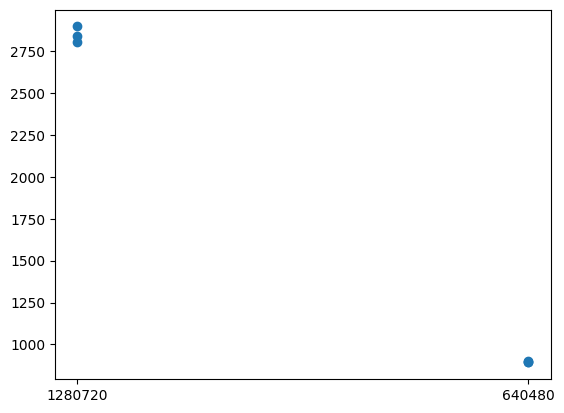

In [70]:
plt.scatter(config_stats['width'] + config_stats['height'], config_stats['energy'])